## Solana Data

At this point, I start to explore the Solana Data. The table on Solana contains the USD opening price, Total Volume, Snapshot time, and Market Capitalization. 

First, we inspect the description of the data. I'll analyse the MEAN, median, range, and standard deviation of the price column.

In [2]:
SELECT price, market_cap/1000000000 AS billions_mcap, total_volume/1000000000 AS billions_volume FROM 'sol-usd-max.csv';

,price,billions_mcap,billions_volume
0,0.957606,0.007828,0.092673
1,0.784711,0.006174,0.049459
2,0.875994,0.007270,0.037821
3,0.786712,0.006302,0.019579
4,0.666673,0.005306,0.017524
...,...,...,...
1484,143.549873,64.310516,3.482327
1485,146.111043,65.431941,3.337412
1486,145.685713,65.139242,2.258971
1487,152.654863,68.319201,3.129079


In [6]:
SELECT 
	ROUND(AVG(price),2) AS mean, 
	ROUND(MIN(price),2) AS min_price, 
	ROUND(MAX(price),2) AS max_price, 
	ROUND(STDDEV(price),2) AS stddev, 
	ROUND(PERCENTILE_CONT(0.50) WITHIN GROUP 
		  (ORDER BY price),2) AS median
FROM 'sol-usd-max.csv'

,mean,min_price,max_price,stddev,median
0,52.74,0.51,259.24,58.01,28.9


In [7]:
SELECT 
	ROUND(AVG(market_cap),2) AS mean, 
	ROUND(MIN(market_cap),2) AS min_mcap, 
	ROUND(MAX(market_cap),2) AS max_mcap, 
	ROUND(STDDEV(market_cap),2) AS stddev, 
	ROUND(PERCENTILE_CONT(0.50) WITHIN GROUP 
		  (ORDER BY market_cap),2) AS median
FROM 'sol-usd-max.csv'

,mean,min_mcap,max_mcap,stddev,median
0,1.847900e+10,4171226.3,9.010785e+10,2.067498e+10,9.697572e+09


In [8]:
SELECT 
	ROUND(AVG(total_volume),2) AS mean, 
	ROUND(MIN(total_volume),2) AS min_vol, 
	ROUND(MAX(total_volume),2) AS max_vol, 
	ROUND(STDDEV(total_volume),2) AS stddev, 
	ROUND(PERCENTILE_CONT(0.50) WITHIN GROUP 
		  (ORDER BY total_volume),2) AS median
FROM 'sol-usd-max.csv'

,mean,min_vol,max_vol,stddev,median
0,1.281081e+09,548910.11,1.614909e+10,1.667987e+09,6.907014e+08


In [9]:
SELECT 
	date_trunc('week', snapped_at) AS week, 
	AVG(market_cap) AS avg_mcap, 
	AVG(total_volume) AS avg_vol, 
	AVG(price) AS avg_price
FROM 'sol-usd-max.csv' AS sol
GROUP BY 1
ORDER BY 1

,week,avg_mcap,avg_vol,avg_price
0,2020-04-06 00:00:00+00:00,7.000630e+06,7.106568e+07,0.871159
1,2020-04-13 00:00:00+00:00,5.752891e+06,1.873465e+07,0.713394
2,2020-04-20 00:00:00+00:00,4.896940e+06,1.089356e+07,0.613357
3,2020-04-27 00:00:00+00:00,5.425087e+06,6.456288e+06,0.675611
4,2020-05-04 00:00:00+00:00,5.080859e+06,2.923934e+06,0.635546
...,...,...,...,...
209,2024-04-08 00:00:00+00:00,7.473176e+10,4.266713e+09,167.505607
210,2024-04-15 00:00:00+00:00,6.350079e+10,5.720628e+09,142.114507
211,2024-04-22 00:00:00+00:00,6.606483e+10,3.360146e+09,147.714476
212,2024-04-29 00:00:00+00:00,6.170823e+10,3.452989e+09,137.822662


,week,avg_mcap,avg_vol,avg_price
0,2020-04-06 00:00:00+00:00,7.000630e+06,7.106568e+07,0.871159
1,2020-04-13 00:00:00+00:00,5.752891e+06,1.873465e+07,0.713394
2,2020-04-20 00:00:00+00:00,4.896940e+06,1.089356e+07,0.613357
3,2020-04-27 00:00:00+00:00,5.425087e+06,6.456288e+06,0.675611
4,2020-05-04 00:00:00+00:00,5.080859e+06,2.923934e+06,0.635546
...,...,...,...,...
209,2024-04-08 00:00:00+00:00,7.473176e+10,4.266713e+09,167.505607
210,2024-04-15 00:00:00+00:00,6.350079e+10,5.720628e+09,142.114507
211,2024-04-22 00:00:00+00:00,6.606483e+10,3.360146e+09,147.714476
212,2024-04-29 00:00:00+00:00,6.170823e+10,3.452989e+09,137.822662


,week,avg_mcap,avg_vol,avg_price
0,2020-04-06 00:00:00+00:00,7.000630e+06,7.106568e+07,0.871159
1,2020-04-13 00:00:00+00:00,5.752891e+06,1.873465e+07,0.713394
2,2020-04-20 00:00:00+00:00,4.896940e+06,1.089356e+07,0.613357
3,2020-04-27 00:00:00+00:00,5.425087e+06,6.456288e+06,0.675611
4,2020-05-04 00:00:00+00:00,5.080859e+06,2.923934e+06,0.635546
...,...,...,...,...
209,2024-04-08 00:00:00+00:00,7.473176e+10,4.266713e+09,167.505607
210,2024-04-15 00:00:00+00:00,6.350079e+10,5.720628e+09,142.114507
211,2024-04-22 00:00:00+00:00,6.606483e+10,3.360146e+09,147.714476
212,2024-04-29 00:00:00+00:00,6.170823e+10,3.452989e+09,137.822662


,week,avg_mcap,avg_vol,avg_price
0,2020-04-06 00:00:00+00:00,7.000630e+06,7.106568e+07,0.871159
1,2020-04-13 00:00:00+00:00,5.752891e+06,1.873465e+07,0.713394
2,2020-04-20 00:00:00+00:00,4.896940e+06,1.089356e+07,0.613357
3,2020-04-27 00:00:00+00:00,5.425087e+06,6.456288e+06,0.675611
4,2020-05-04 00:00:00+00:00,5.080859e+06,2.923934e+06,0.635546
...,...,...,...,...
209,2024-04-08 00:00:00+00:00,7.473176e+10,4.266713e+09,167.505607
210,2024-04-15 00:00:00+00:00,6.350079e+10,5.720628e+09,142.114507
211,2024-04-22 00:00:00+00:00,6.606483e+10,3.360146e+09,147.714476
212,2024-04-29 00:00:00+00:00,6.170823e+10,3.452989e+09,137.822662


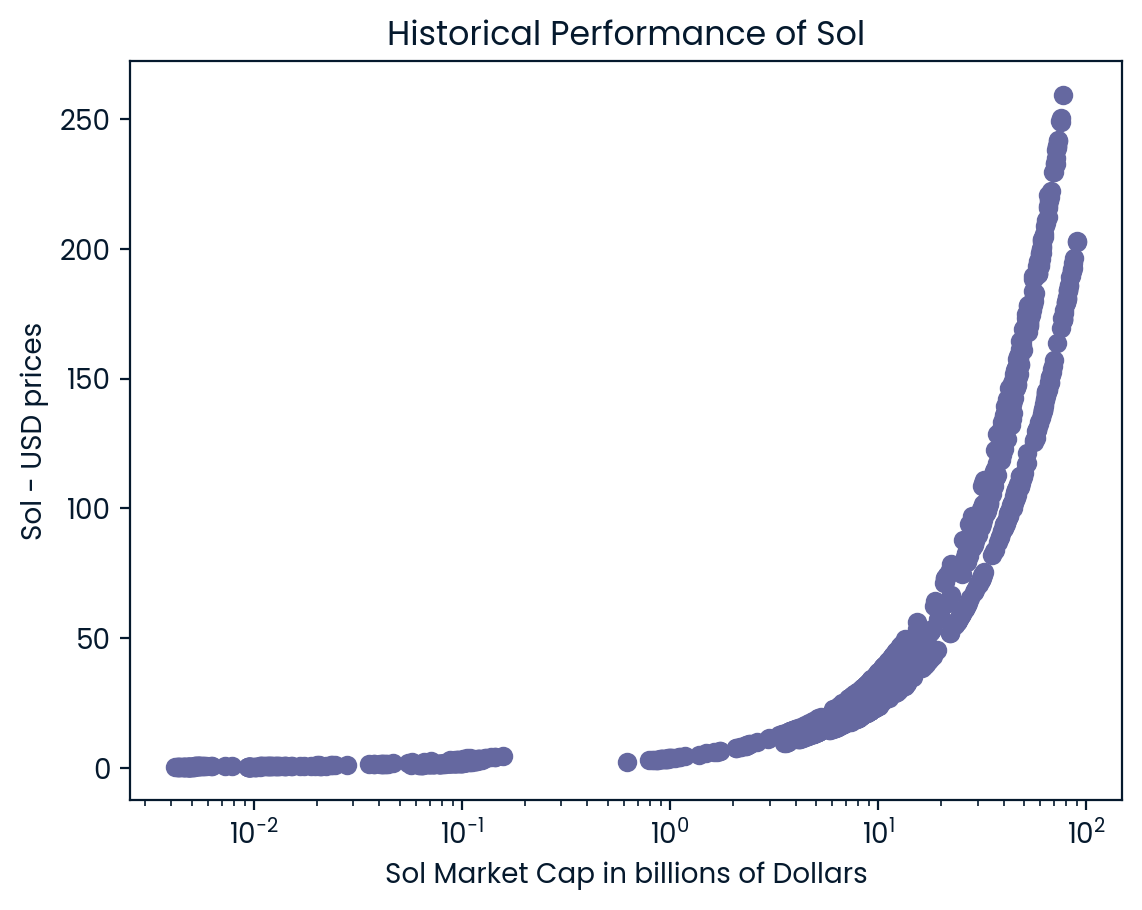

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df3['billions_mcap'], df3['price'])
plt.xscale('log')
plt.xlabel('Sol Market Cap in billions of Dollars')
plt.ylabel('Sol - USD prices')
plt.title('Historical Performance of Sol')
plt.show()

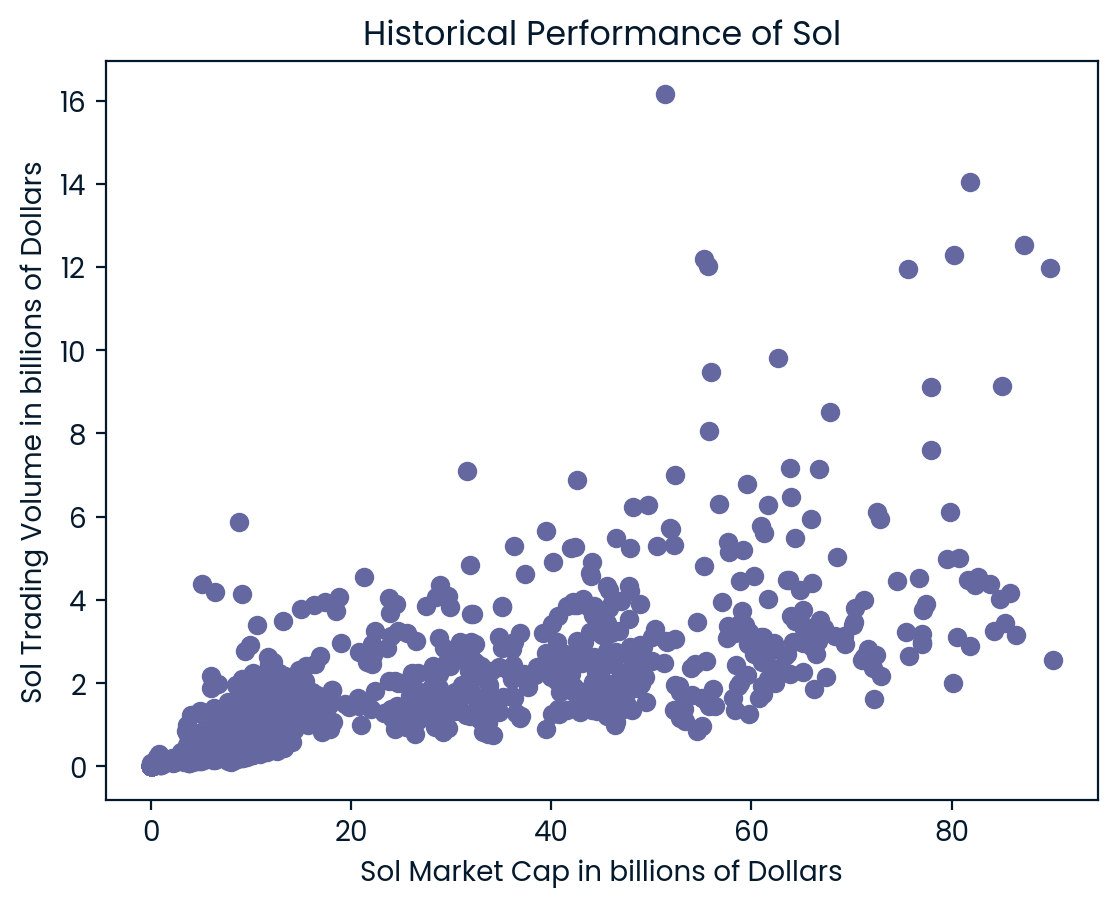

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df3['billions_mcap'], df3['billions_volume'])
plt.xlabel('Sol Market Cap in billions of Dollars')
plt.ylabel('Sol Trading Volume in billions of Dollars')
plt.title('Historical Performance of Sol')
plt.show()

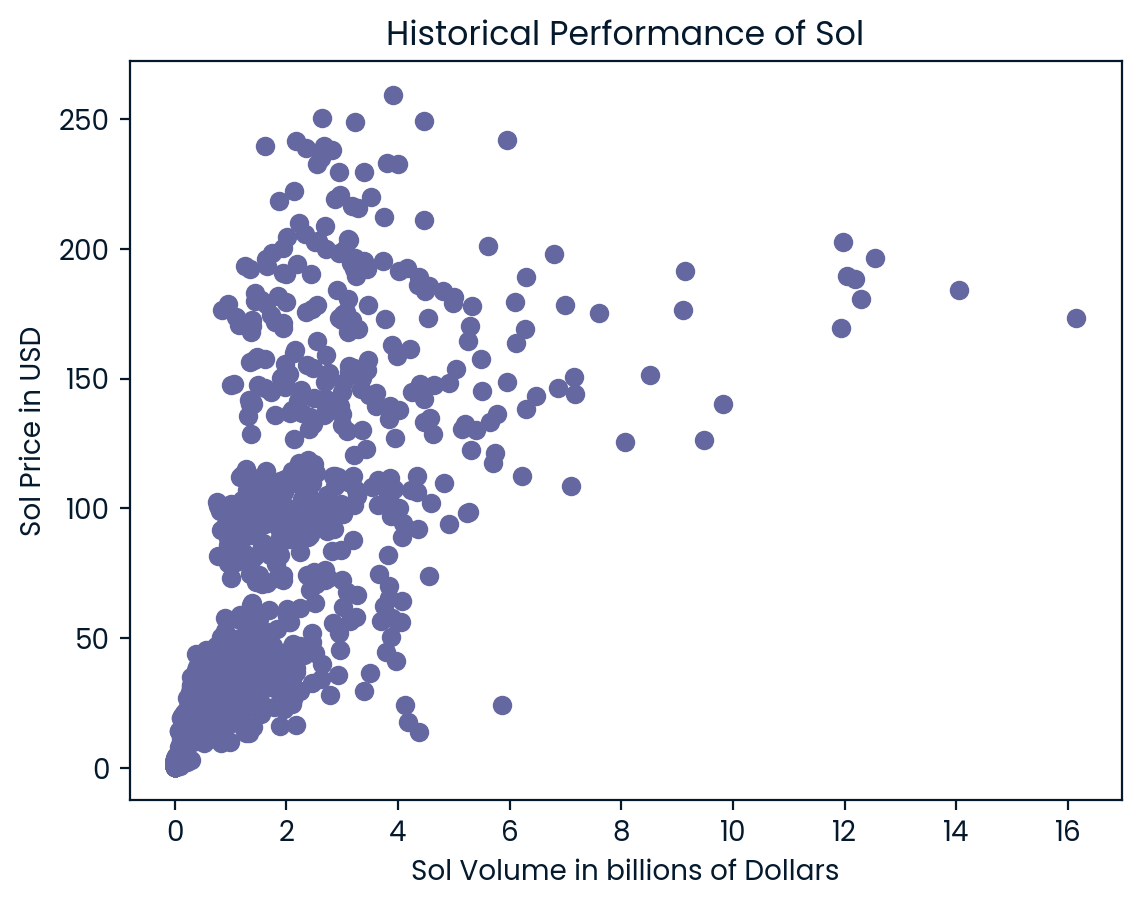

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df3['billions_volume'], df3['price'])
plt.ylabel('Sol Price in USD')
plt.xlabel('Sol Volume in billions of Dollars')
plt.title('Historical Performance of Sol')
plt.show()

In [26]:
-- earliest date for solana data is 2020-04-11, while eth is 2015-08-07
-- latest date for both is 2024-05-08
SELECT snapped_at
FROM 'sol-usd-max.csv'
ORDER BY 1 desc
limit 1

,snapped_at
0,2024-05-08 00:00:00+00:00
